In [47]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df1=pd.read_csv("Data/tn.movie_budgets.csv", parse_dates = ['release_date'])
df1.head()

df1_clean=df1.copy()

In [49]:
df1_clean.drop(["id"], axis =1, inplace = True)

Change the datatypes of the production_budget, domestic_gross, worlwide_gross into integers. 
Also the release_date into a DateTime. 
Made a copy of df1 so we don't override the original data table. 

In [50]:
df1_clean["production_budget"]=df1_clean['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [51]:
df1_clean["domestic_gross"] = df1_clean['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [52]:
df1_clean["worldwide_gross"] = df1_clean["worldwide_gross"].str.replace(',', '').str.replace('$', '').astype(int)

In [53]:
df1_clean.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [54]:
df2 = pd.read_csv("Data/movie_profession.csv", index_col = 0)
df2.head()



,movie_id,primary_title,genres,averagerating,numvotes,category,primary_name
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.00000,77,actor,Dilip Kumar
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.00000,77,actress,Vyjayanthimala
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.00000,77,actor,Balraj Sahni
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.00000,77,actor,Sanjeev Kumar
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.00000,77,director,Harnam Singh Rawail


In [55]:
df2_clean = df2.copy()
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406119 entries, 0 to 406118
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       406119 non-null  object 
 1   primary_title  406119 non-null  object 
 2   genres         402529 non-null  object 
 3   averagerating  406119 non-null  float64
 4   numvotes       406119 non-null  int64  
 5   category       406119 non-null  object 
 6   primary_name   406119 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


In [56]:
df2_clean["genres"].value_counts()

Drama                            74101
Comedy                           35998
Documentary                      26504
Horror                           17423
Comedy,Drama                     17216
                                 ...  
Action,Documentary,War               1
Documentary,Drama,Western            1
Action,Documentary,News              1
Adventure,Documentary,Fantasy        1
Documentary,News,Sport               1
Name: genres, Length: 920, dtype: int64

Started with cleaning the index. 
Now we will clean df2 and start with dropping the following columns : "runtime_minutes" and "start year" 
We also want to fill the genre missing values with fillNA = "unknown". 
Because we want to be reccomending by genre, we will want to use the .explode() on the genre subcategories to make that column clearer. 


In [57]:
df2_clean['genres'] = df2_clean['genres'].fillna("unknown")

In [58]:
df2_clean.rename({'primary_title':'movie', 'primary_name':'name'}, axis=1, inplace = True)

In [59]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406119 entries, 0 to 406118
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       406119 non-null  object 
 1   movie          406119 non-null  object 
 2   genres         406119 non-null  object 
 3   averagerating  406119 non-null  float64
 4   numvotes       406119 non-null  int64  
 5   category       406119 non-null  object 
 6   name           406119 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


In [60]:
df3 = pd.read_csv("Data/bom.movie_gross.csv")
df3.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00000,664300000,2010
3,Inception,WB,292600000.00000,535700000,2010
4,Shrek Forever After,P/DW,238700000.00000,513900000,2010


For df3, we will want to utilize the studio column and the title column will be used to merge with other dataframes. 
We can drop domestic_gross, foreign_gross, and year because that information is in df1. 

In [61]:
df3_clean = df3.copy()
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [62]:
df3_clean.drop(["domestic_gross"], axis = 1, inplace = True)

In [63]:
df3_clean.drop(["foreign_gross"], axis = 1, inplace = True)

In [64]:
df3_clean.drop(["year"], axis = 1, inplace = True)

In [65]:
df3_clean.dropna(subset = ["studio"], inplace = True)

In [66]:
df3_clean.rename({'title':'movie'}, axis=1, inplace = True)

In [67]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   3382 non-null   object
 1   studio  3382 non-null   object
dtypes: object(2)
memory usage: 79.3+ KB


We then merged df3_clean with df1_clean with the inner join to create the new movie_revenue dataframe. 

In [68]:
movie_revenue = df1_clean.merge(df3_clean)

In [69]:
movie_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1245
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1246 non-null   datetime64[ns]
 1   movie              1246 non-null   object        
 2   production_budget  1246 non-null   int64         
 3   domestic_gross     1246 non-null   int64         
 4   worldwide_gross    1246 non-null   int64         
 5   studio             1246 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 68.1+ KB


In [70]:
movie_revenue.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV
1,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV
3,2017-11-17,Justice League,300000000,229024295,655945209,WB
4,2015-11-06,Spectre,300000000,200074175,879620923,Sony


Now we will want to merge df2_copy with movie_revenue. 
We renamed the primary_title column name into movie. 
The new table will be called master_movie. 

In [71]:
master_movie = movie_revenue.merge(df2_clean)
#master_movie.set_index(['movie_id'], inplace = True)

first_column = master_movie.pop('movie_id')
master_movie.insert(0, 'movie_id', first_column)

master_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9645 entries, 0 to 9644
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           9645 non-null   object        
 1   release_date       9645 non-null   datetime64[ns]
 2   movie              9645 non-null   object        
 3   production_budget  9645 non-null   int64         
 4   domestic_gross     9645 non-null   int64         
 5   worldwide_gross    9645 non-null   int64         
 6   studio             9645 non-null   object        
 7   genres             9645 non-null   object        
 8   averagerating      9645 non-null   float64       
 9   numvotes           9645 non-null   int64         
 10  category           9645 non-null   object        
 11  name               9645 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 979.6+ KB


In [72]:
master_movie.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Johnny Depp
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actress,Penélope Cruz
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Ian McShane
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,actor,Geoffrey Rush
4,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624,director,Rob Marshall


In [73]:
master_movie['category'].value_counts()

actor       3455
producer    2625
actress     2067
director    1498
Name: category, dtype: int64

In [74]:
len(master_movie['movie'].unique())

1157

In [75]:
master_movie_unique = master_movie.copy()
master_movie_unique.drop(['category'], axis=1, inplace=True)
master_movie_unique.drop(['name'], axis=1, inplace=True)
master_movie_unique.drop_duplicates(subset='movie_id', ignore_index=True)

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.60000,447624
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.30000,665594
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.50000,670926
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.50000,329135
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.80000,352504
...,...,...,...,...,...,...,...,...,...,...
1388,tt1748207,2012-04-27,Sound of My Voice,135000,408015,429448,FoxS,"Drama,Mystery,Sci-Fi",6.60000,19387
1389,tt1742336,2012-06-15,Your Sister's Sister,120000,1597486,3090593,IFC,"Comedy,Drama",6.70000,24780
1390,tt2309260,2015-07-10,The Gallows,100000,22764410,41656474,WB (NL),"Horror,Mystery,Thriller",4.20000,17763
1391,tt6265828,2017-07-07,A Ghost Story,100000,1594798,2769782,A24,"Drama,Fantasy,Romance",6.80000,46280


In [76]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
master_movie_unique.describe()

,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
count,9645.00000,9645.00000,9645.00000,9645.00000,9645.00000
mean,44417341.99471,57786658.03152,143539257.44386,6.42455,115115.62748
std,53216941.25162,81464585.43240,225386668.41759,1.01652,162412.49660
min,50000.00000,0.00000,0.00000,1.60000,5.00000
25%,10000000.00000,6900335.00000,16727470.00000,5.90000,15882.00000
50%,25000000.00000,31177548.00000,62076141.00000,6.50000,60510.00000
75%,55000000.00000,71628180.00000,162502774.00000,7.10000,138947.00000
max,410600000.00000,700059566.00000,2048134200.00000,9.20000,1841066.00000


In [77]:
master_movie_unique['production_budget'].value_counts()

10000000     414
20000000     410
40000000     369
25000000     367
30000000     335
            ... 
9700000        5
97000000       5
410600000      5
187500000      5
600000         4
Name: production_budget, Length: 219, dtype: int64

In [78]:
master_movie_unique['domestic_gross'].value_counts()

0            140
13843771      46
2703296       37
138141585     36
19800         34
            ... 
78031620       4
34522221       4
3419967        3
4311834        2
325491         1
Name: domestic_gross, Length: 1158, dtype: int64

In [79]:
master_movie_unique['numvotes'].value_counts()

10      62
6       60
12      51
8       49
14      41
        ..
84       1
43       1
19       1
2925     1
130      1
Name: numvotes, Length: 1296, dtype: int64

In [80]:
#We can use this Outliers function or can plot a boxplot. 
#Outliers
#def outlier_treatment(x, lower, upper):
    #if (lower >= x) or (x >= upper):
        #return 'Yes'
    #else:
        #return 'No'

#columns_to_check = ['column_names']

#for col in columns_to_check: 
    #Q1,Q3 = np.percentile(df[col],[25,75])
    #IQR = Q3 - Q1

    #lower_bound = Q1 - (1.5 * IQR)
    #upper_bound = Q3 + (1.5 * IQR)

    #df['outlier'] = df[col].apply(lambda x: outlier_treatment(x, lower_bound,upper_bound))
    #print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [81]:
def outlier_treatment(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 'Yes'
    else:
        return 'No'

columns_to_check = ['column_names']

for col in columns_to_check: 
    Q1,Q3 = np.percentile(df[col],[25,75])
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df['outlier'] = df[col].apply(lambda x: outlier_treatment(x, lower_bound,upper_bound))
    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

NameError: name 'df' is not defined

In [85]:
columns_to_check = ['production_budget']
df = master_movie_unique
for col in columns_to_check: 
    Q1,Q3 = np.percentile(df[col],[25,75])
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df['outlier'] = df[col].apply(lambda x: outlier_treatment(x, lower_bound,upper_bound))
    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

The lower and upper bound of the range for 'production_budget' respectively is: -57500000.0 and 122500000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff528fbd310>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff528fbd9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4e974cf70>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff528fc90d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff528fc9430>,
 'means': []}

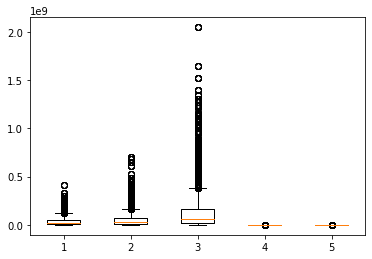

In [82]:
x1 = master_movie_unique['production_budget']
x2 = master_movie_unique['domestic_gross']
x3 = master_movie_unique['worldwide_gross']
x4 = master_movie_unique['averagerating']
x5 = master_movie_unique['numvotes']
plt.boxplot([x1,x2,x3,x4,x5])

In [ ]:
master_movie.to_csv('master_movie.csv')

In [ ]:
df4 = pd.read_csv("Data/movie_profession.csv")
df4.head()

In [ ]:
df5 = pd.read_table('Data/rt.movie_info.tsv')
df5.head()

We decided not to use the reviews csv. From here we will clean up the other csv tables by dropping columns we won't need and merging tables with common keys. 